# Regression Assignment

* You are required to use the below dataset on house prices to train a regression model:

https://www.kaggle.com/datasets/vikrishnan/boston-house-prices

#### Requirements:

- Divide dataset after importing into Train/Cross Validation/Test

- Test various hypothesis with different degrees and optimize your model and parameters using cross validation & test sets as explained in the lecture

- Apply Regularization and optimize the value of its parameter

##### Dataset Info:
* CRIM: per capita crime rate by town
* ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS: proportion of non-retail business acres per town
* CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX: nitric oxides concentration (parts per 10 million)
* RM: average number of rooms per dwelling
* AGE: proportion of owner-occupied units built prior to 1940
* DIS: weighted distances to five Boston employment centres
* RAD: index of accessibility to radial highways
* TAX: full-value property-tax rate per 10,000usd
* PTRATIO: pupil-teacher ratio by town
* B 1000(Bk - 0.63)^2" where Bk is the proportion of blacks by town
* LSTAT: % lower status of the population

##### Importing libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.model_selection import cross_val_score

from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as geek

import warnings # supress warnings
warnings.filterwarnings('ignore')

###### Importing and preparing dataset

In [3]:
boston = load_boston()
data = pd.DataFrame(boston.data)

data.columns = boston.feature_names

####   'PRICE' is Median value of owner-occupied homes in $1000s

In [4]:
data['PRICE'] = boston.target 

#### Data set info & stats

In [5]:
#data.describe()
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Finding Relations and trends between variables
* This will help us 'choose' which predictors to visualize with the target

In [6]:
# Correlation between features
corr = data.corr()

<AxesSubplot:>

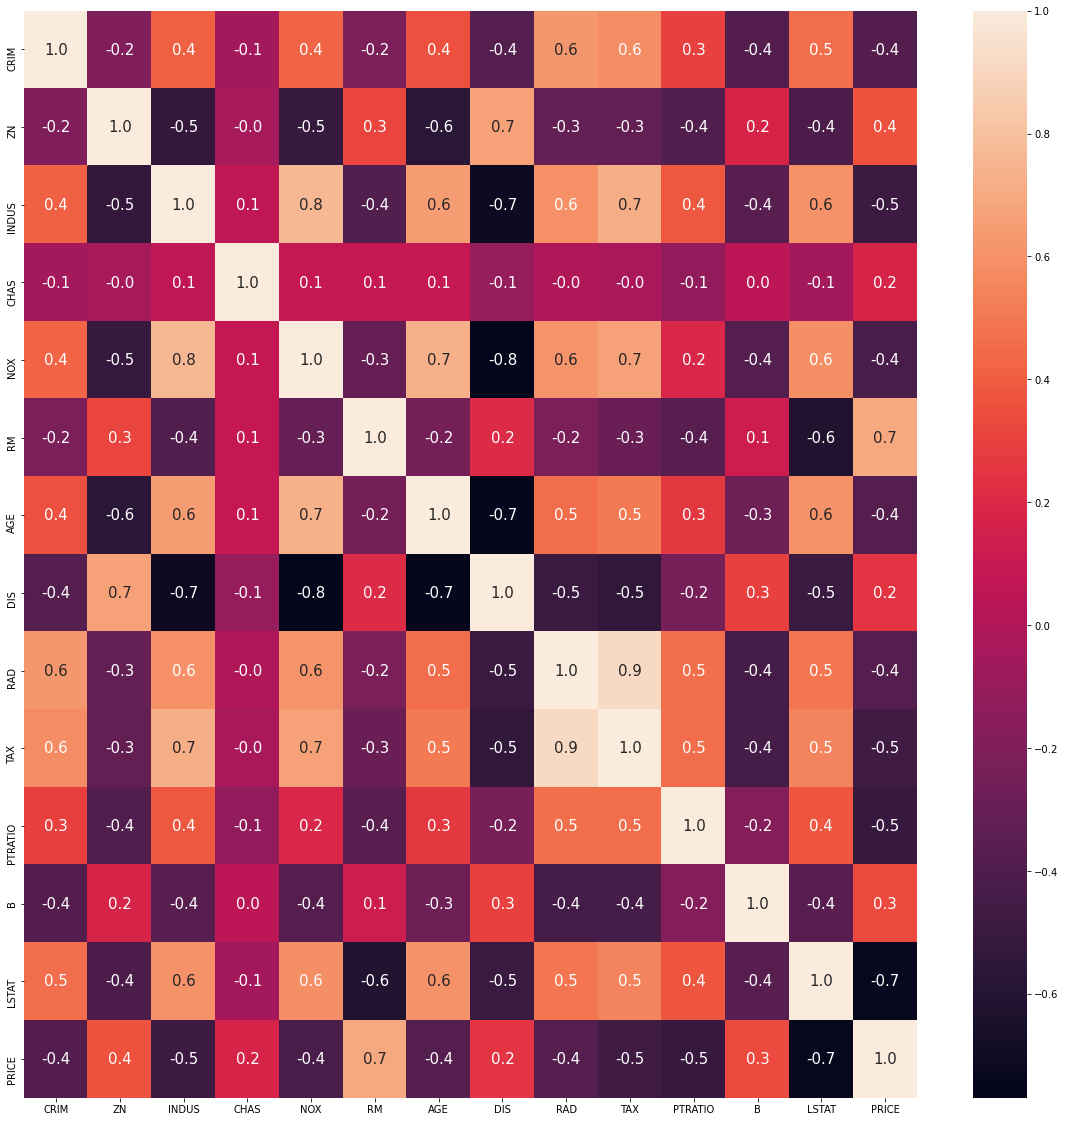

In [7]:
# Plotting the heatmap of correlation between features
# I was able to use sns.heatmap as the features are considered independent (of each other)
# The target value, PRICE, is dependent on the correlated value(s)

plt.figure(figsize=(20,20))

sns.heatmap(corr, fmt='.1f', annot=True, annot_kws={'size':15})

### Standardization and Scaling
* This will be done to the selected predictor and the specified target to better understand the relations through visualizations
    * And to prepare for splitting

In [8]:
# Filter only one predictor and PRICE
df = data.loc[:, ['RM', 'PRICE']]
df.head()

,RM,PRICE
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2


In [9]:
## Rescaling the variables 
df_columns = df.columns
scaler = MinMaxScaler()
df = scaler.fit_transform(df)

# renaming columns (since now its an np array)
df = pd.DataFrame(df)
df.columns = df_columns

<AxesSubplot:xlabel='RM', ylabel='PRICE'>

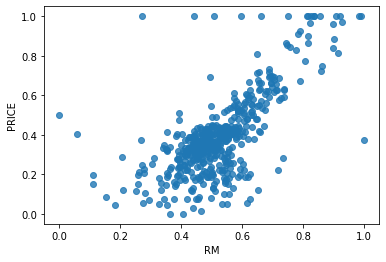

In [32]:
# Visualise room per dwelling and price relationship
sns.regplot(x="RM", y="PRICE", data=df.loc[:, ['RM', 'PRICE']], fit_reg=False)

In [11]:
# Splitting target variable (y) and independent predictor' variables (X) apart
X = df.drop(['PRICE'], axis = 1)
y = df['PRICE']

In [15]:
# Splitting target variable (y) and independent predictors variables (X) apart 
x_pr = data.drop(['PRICE'], axis = 1)
y_pr = data['PRICE']

### Divide dataset after importing into Train/Cross Validation/Test

In [35]:
# Splitting to training and testing data for PRICE and RM with CV (Single Variable)  (dataframe --> df)

X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    train_size = 0.6, random_state = 1)

In [29]:
# Splitting to training and testing data for PRICE and predictors with CV (Multi-Variable) (dataframe --> data)

X_multrain, X_multest, y_multrain, y_multest = train_test_split(x_pr,y_pr, 
                                                    train_size = 0.6, random_state = 2)

## Linear Regression

####  Model 1 

In [36]:
# Create a Linear regressor
lr = LinearRegression()

# Train the model using the training sets 
lr.fit(X_train, y_train)


LinearRegression()

In [37]:
print('Slope: {} , y-intercept: {} '.format(lr.coef_,lr.intercept_))

Slope: [1.08216654] , y-intercept: -0.1754221574909205 


In [38]:
# fit multiple polynomial features
degrees = [1, 2, 3, 6, 10, 20]

# initialise y_train_pred and y_test_pred matrices to store the train and test predictions
# each row is a data point, each column a prediction using a polynomial of some degree
y_train_pred = np.zeros((len(X_train), len(degrees)))
y_test_pred = np.zeros((len(X_test), len(degrees)))

for i, degree in enumerate(degrees):
    
    # make pipeline: create features, then feed them to linear_reg model
    model = make_pipeline(PolynomialFeatures(degree), lr)
    model.fit(X_train, y_train)
    
    # predict on test and train data
    # store the predictions of each degree in the corresponding column
    y_train_pred[:, i] = model.predict(X_train)
    y_test_pred[:, i] = model.predict(X_test)


In [50]:
y_train_pred_df = pd.DataFrame(y_train_pred)

Text(0.5, 1.0, 'Test')

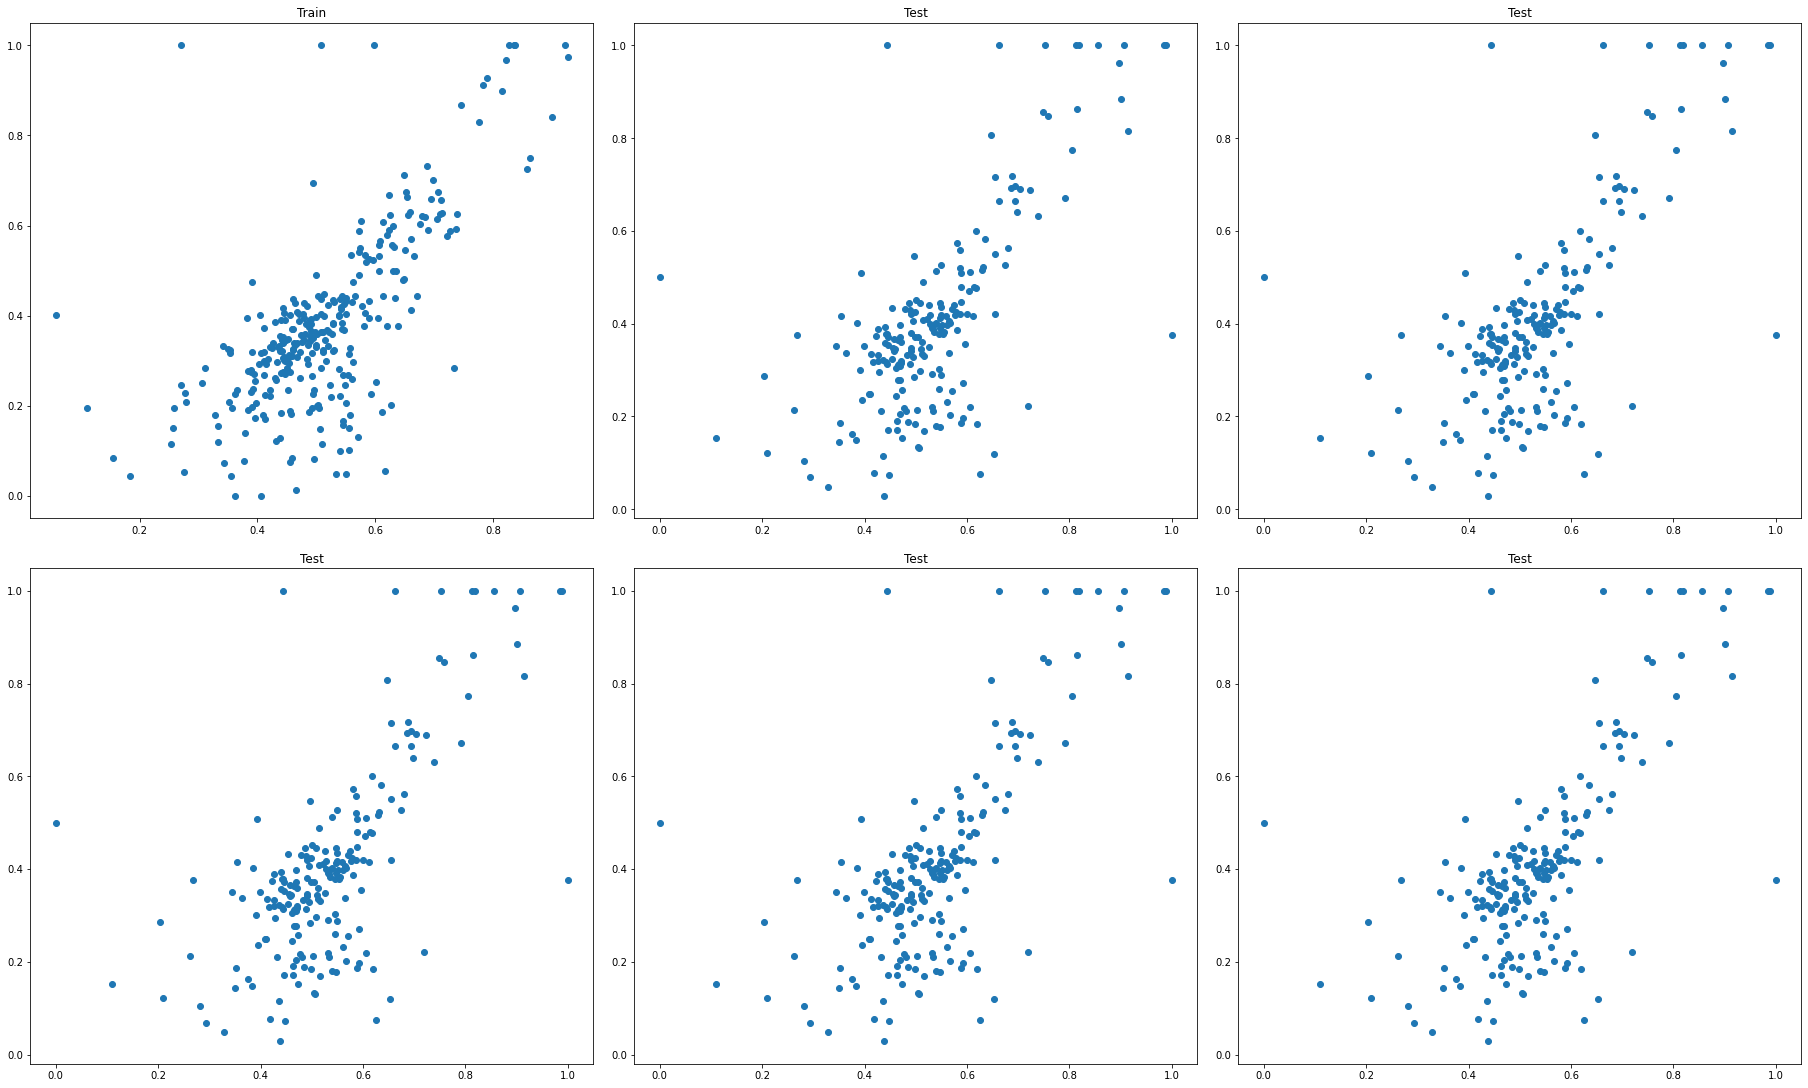

In [117]:
# Subplot Reference
fig, axs = plt.subplots(nrows=2, ncols=3,figsize=(25, 15),constrained_layout=True)

axs[0,0].scatter(X_train, y_train)
axs[0,0].set_title('Train')

axs[0,1].scatter(X_test,y_test)
axs[0,1].set_title('Test')

axs[0,2].scatter(X_test,y_test)
axs[0,2].set_title('Test')

axs[1,0].scatter(X_test,y_test)
axs[1,0].set_title('Test')

axs[1,1].scatter(X_test,y_test)
axs[1,1].set_title('Test')

axs[1,2].scatter(X_test,y_test)
axs[1,2].set_title('Test')


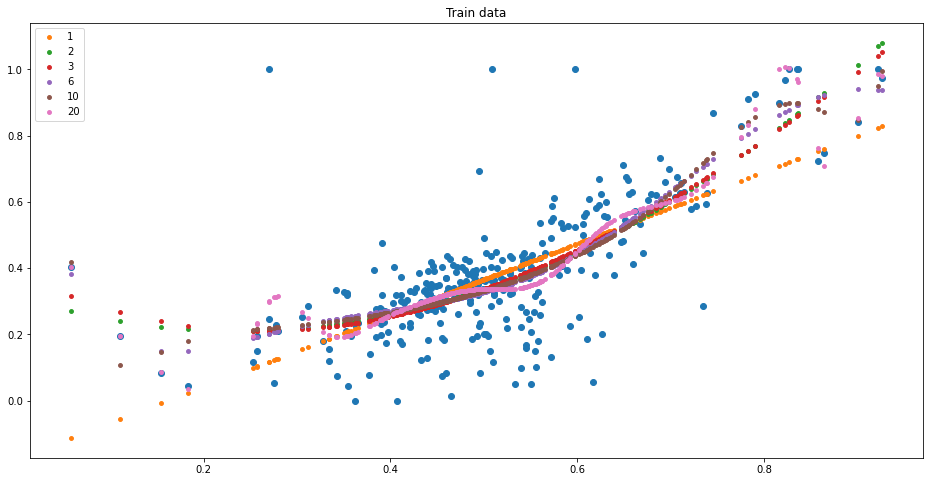

In [100]:
plt.figure(figsize=(16, 8))

# train data
plt.scatter(X_train, y_train)
plt.title("Train data")
for i, degree in enumerate(degrees):    
    plt.scatter(X_train, y_train_pred[:, i], s=15, label=str(degree))
    plt.legend(loc='upper left')
    

#### Test Data

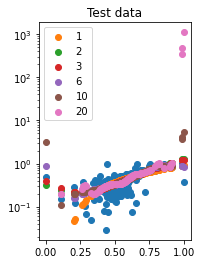

In [78]:
plt.scatter(X_test, y_test)
plt.yscale('log')
plt.title("Test data")
for i, degree in enumerate(degrees):    
    plt.scatter(X_test, y_test_pred[:, i], label=str(degree))
    plt.legend(loc='upper left')

In [44]:
print("Using R-squared : \n")
for i, degree in enumerate(degrees):
    train_r2 = round(metrics.r2_score(y_train, y_train_pred[:, i]), 4)
    test_r2 = round(metrics.r2_score(y_test, y_test_pred[:, i]), 4)
    print("Polynomial degree {}: train score={}, test score={}".format(degree, 
                                                                         train_r2, 
                                                                         test_r2))

Using R-squared : 

Polynomial degree 1: train score=0.4908, test score=0.4695
Polynomial degree 2: train score=0.5658, test score=0.5071
Polynomial degree 3: train score=0.5666, test score=0.5252
Polynomial degree 6: train score=0.5768, test score=0.5843
Polynomial degree 10: train score=0.5803, test score=-4.9239
Polynomial degree 20: train score=0.6089, test score=-4919098.8021


In [45]:
for poly in range(6):
    print('R^2:',metrics.r2_score(y_train, y_train_pred_df[poly]))

R^2: 0.4907544465829954
R^2: 0.5658087436863499
R^2: 0.5665820497401831
R^2: 0.5768376924431552
R^2: 0.5802928950901667
R^2: 0.6088622793942319


In [47]:
y_train_pred_df = pd.DataFrame(y_train_pred)
y_train_df = pd.DataFrame(y_train)
y_train_df.head()

,PRICE
452,0.246667
346,0.271111
295,0.524444
88,0.413333
322,0.342222


### Visualizing the actual prices and predicted values
* Differences between prices and predicted values
* Checking for residuals
* Checking Normality of errors

* Train 

In [ ]:
for deg in range(len(degrees)):
    plt.scatter(y_train_df, y_train_pred_df[deg])
    plt.xlabel("Prices")
    plt.ylabel("Predicted prices")
    plt.title("Actual vs Predicted prices using degree: {}".format(degrees[deg]))
    plt.show()

In [ ]:
#Preparing train to calculate residuals
train_tmp = y_train_df.sort_index().reset_index().drop(['index'],axis=1)
residualss = pd.DataFrame(index=np.arange(354), columns=np.arange(6))

for k in range(6):
    residualss[k] = y_train_pred_df[k] - train_tmp['PRICE']

In [ ]:
for deg in range(len(degrees)):
    plt.scatter(y_train_pred_df[deg], residualss[deg])
    plt.title("Predicted vs residuals using degree: {}".format(degrees[deg]))
    plt.xlabel("Predicted")
    plt.ylabel("Residuals")
    plt.show()

In [ ]:
# Checking Normality of errors
for deg in range(len(degrees)):
    sns.distplot(residualss[deg])
    plt.title("Histogram of Residuals of degree: {}".format(degrees[deg]))
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.show()

####  Model 2

In [ ]:
# Create a Linear regressor
lr2 = LinearRegression()

# Train the model using the training sets 
lr2.fit(X_multrain, y_multrain)


In [ ]:
lr2.intercept_

In [ ]:
#Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([X_multrain.columns,lr2.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

In [ ]:
y_mulpred = lr2.predict(X_multrain)

In [ ]:
print('R^2:',metrics.r2_score(y_multrain, y_mulpred))